In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.shape

(1338, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [8]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [9]:
df.columns.groupby(df.dtypes)

{dtype('int64'): Index(['age', 'sex', 'children', 'smoker', 'region', 'insuranceclaim'], dtype='object'),
 dtype('float64'): Index(['bmi', 'charges'], dtype='object')}

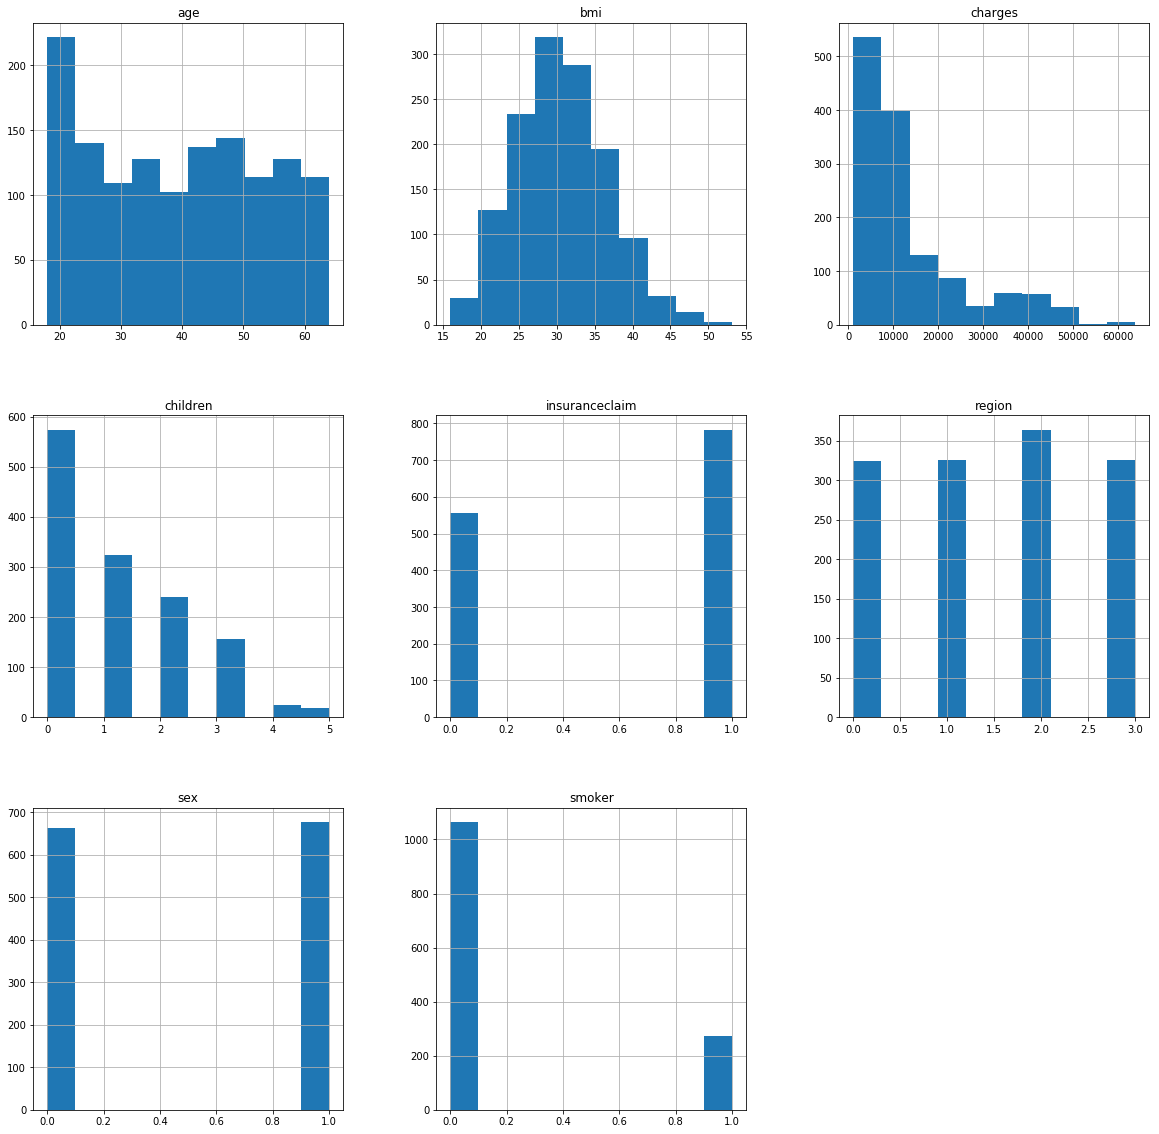

In [10]:
df.hist(figsize=(20,20))
plt.show()

In [11]:
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

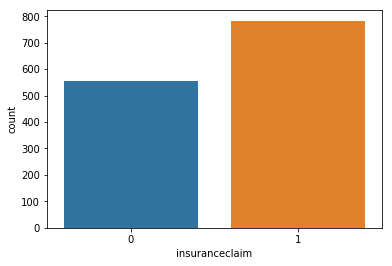

In [12]:
sns.countplot(x='insuranceclaim',data=df)

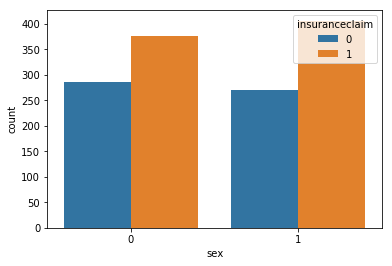

In [13]:
sns.countplot(x='sex',data=df,hue='insuranceclaim')

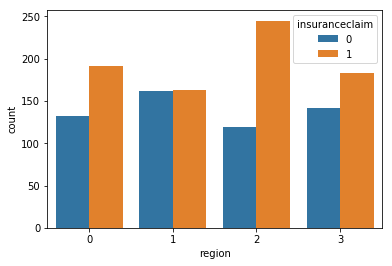

In [14]:
sns.countplot(x='region',data=df,hue='insuranceclaim')

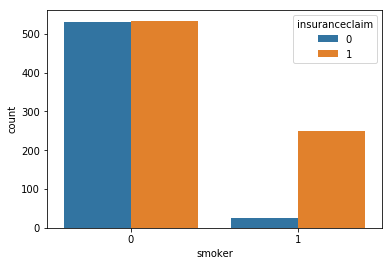

In [15]:
sns.countplot(x='smoker',data=df,hue='insuranceclaim')

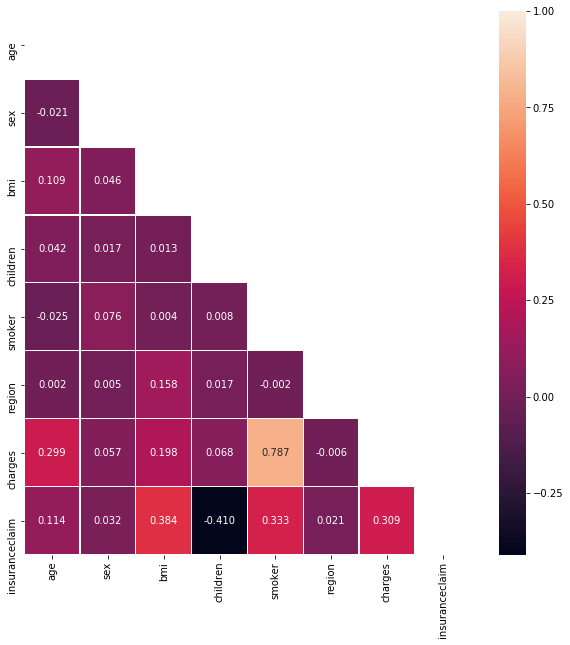

In [16]:
corr=df.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt='.3f',mask=mask,linewidths=0.2)

In [17]:
#dummies=pd.get_dummies(df['region'],drop_first=True)

In [18]:
#df=pd.concat([df.drop(['region'],axis=1),dummies],axis=1)

In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
X=df.drop(['insuranceclaim'],axis=1)
y=df['insuranceclaim']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=18)

C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1070, 7) (1070,) (268, 7) (268,)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [23]:
print(X_train.shape,X_test.shape)

(1070, 7) (268, 7)


In [24]:
X_train

array([[0.36956522, 0.        , 0.52319978, ..., 0.        , 0.33333333,
        0.07175107],
       [0.32608696, 0.        , 0.06278397, ..., 1.        , 0.        ,
        0.249703  ],
       [0.84782609, 0.        , 0.19730139, ..., 0.        , 0.66666667,
        0.33617569],
       ...,
       [0.69565217, 1.        , 0.42640782, ..., 0.        , 1.        ,
        0.13561314],
       [0.63043478, 0.        , 0.26944789, ..., 0.        , 0.        ,
        0.13697732],
       [0.95652174, 1.        , 0.60622332, ..., 0.        , 0.66666667,
        0.18911359]])

In [25]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

C:\Users\Priyanka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
pred=reg.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
print("LR accuracy:", accuracy_score(y_test, pred))

LR accuracy: 0.8917910447761194


In [28]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,pred)
matrix

array([[ 92,  18],
       [ 11, 147]], dtype=int64)

In [29]:
prob=reg.predict_proba(X_test)

In [30]:
from sklearn.metrics import f1_score, roc_auc_score

In [31]:
auc=roc_auc_score(y_test,prob[:,1])
auc

0.9296317606444189

In [32]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',probability=True)
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
pred=clf.predict(X_test)

In [34]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.8955223880597015

In [35]:
prob=clf.predict_proba(X_test)
auc_svc=roc_auc_score(y_test,prob[:,1])
auc_svc

0.9271576524741082

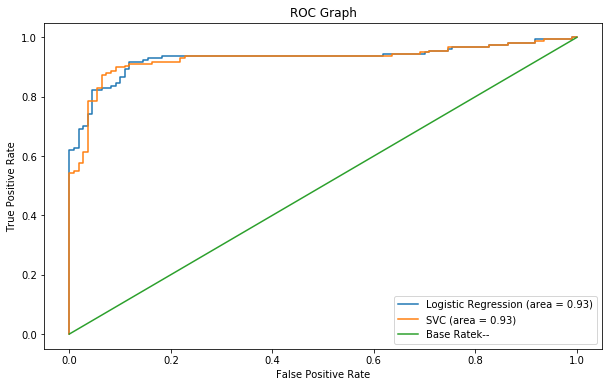

In [36]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,reg.predict_proba(X_test)[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,6))
# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
# Plot Random Forest ROC
plt.plot(svc_fpr, svc_tpr, label='SVC (area = %0.2f)' % auc_svc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()